# 1 Searching for TOI 1798 candidates
TOI-1798 is a star with R=0.78R_sun with two candidate official TOI alerts (https://exofop.ipac.caltech.edu/tess/target.php?id=toi1798). We are interested in assessing these signals and finding additional ones. Hence, we will run the `sherlock` search for this potential multi-planetary system, run the vetting procedure for all the signals and will try to validate them.

We will use the properties file named search.yaml under the same directory than this notebook.

In [1]:
import os
your_execution_dir = os.getcwd()
with open(your_execution_dir + '/search.yaml', 'r') as f:
    print(f.read())


TARGETS:
  'TIC 198153540': #TIC number
     SECTORS: [16, 22, 23, 49, 50]
     INITIAL_SMOOTH_ENABLED: True
     INITIAL_HIGH_RMS_MASK: True
     INITIAL_HIGH_RMS_THRESHOLD: 1.5
     DETREND_METHOD: 'biweight'
     DETRENDS_NUMBER: 12
     DETREND_CORES: 7
     MAX_RUNS: 4
     SNR_MIN: 6
     SDE_MIN: 7
     CPU_CORES: 7
     OVERSAMPLING: 3
     PERIOD_MAX: 20



## Search execution
We would now have to run `sherlock` by running it with a python one-liner. Please take into account that this search takes a lot of computational power and time. Hence, we will run this command in a server and will prompt the output in the notebook instead of executing it here:

`python3.8 -m sherlockpipe --properties search.yaml`

The execution will create a resulting directory named `/TIC198153540_[16, 22, 23, 49, 50]`. Ok, let's inspect the candidates found by `sherlock`:

In [2]:
with open(your_execution_dir + '/TIC198153540_[16,_22,_23,_49,_50]/TIC198153540_[16, 22, 23, 49, 50]_candidates.log', 'r') as f:
    print(f.read())


Listing most promising candidates for ID TIC198153540_[16, 22, 23, 49, 50]:
Detrend no. Period    Per_err   Duration  T0      Depth   SNR     SDE     FAP       Border_score  Matching OI   Harmonic    Planet radius (R_Earth)  Rp/Rs     Semi-major axis   Habitability Zone   
11          8.0217    0.00087   101.82    1741.59 0.867   35.52   56.19   0.000080  1.00          TOI 1798.01   -           2.52338                  0.02685   0.07512           I                   
1           0.8756    0.00005   51.16     1739.51 0.250   22.41   52.78   0.000080  0.99          nan           -           1.35574                  0.01357   0.01716           I                   
1           0.8756    0.00005   50.76     1739.07 0.271   24.38   193.31  0.000080  0.98          nan           1*SOI2      1.41017                  0.01372   0.01716           I                   
8           19.1234   0.00111   133.84    1747.01 0.415   13.36   351.01  0.000080  0.83          nan           -           1.74641 

It seems that `sherlock` has spotted the TOI-1798.01 but did not find TOI-1798.02. The latest should have a period of 0.44 days aproximately, which is the half of the found signals in both the second and third runs. That means that `sherlock` spotted TOI-1798.02 in two different runs. This happened because the default minimum period for `sherlock` searches is 0.5 days and we didn't change it. 

In addition, a latest signal has been found at 19.12 days in the fourth run. We can take a look:

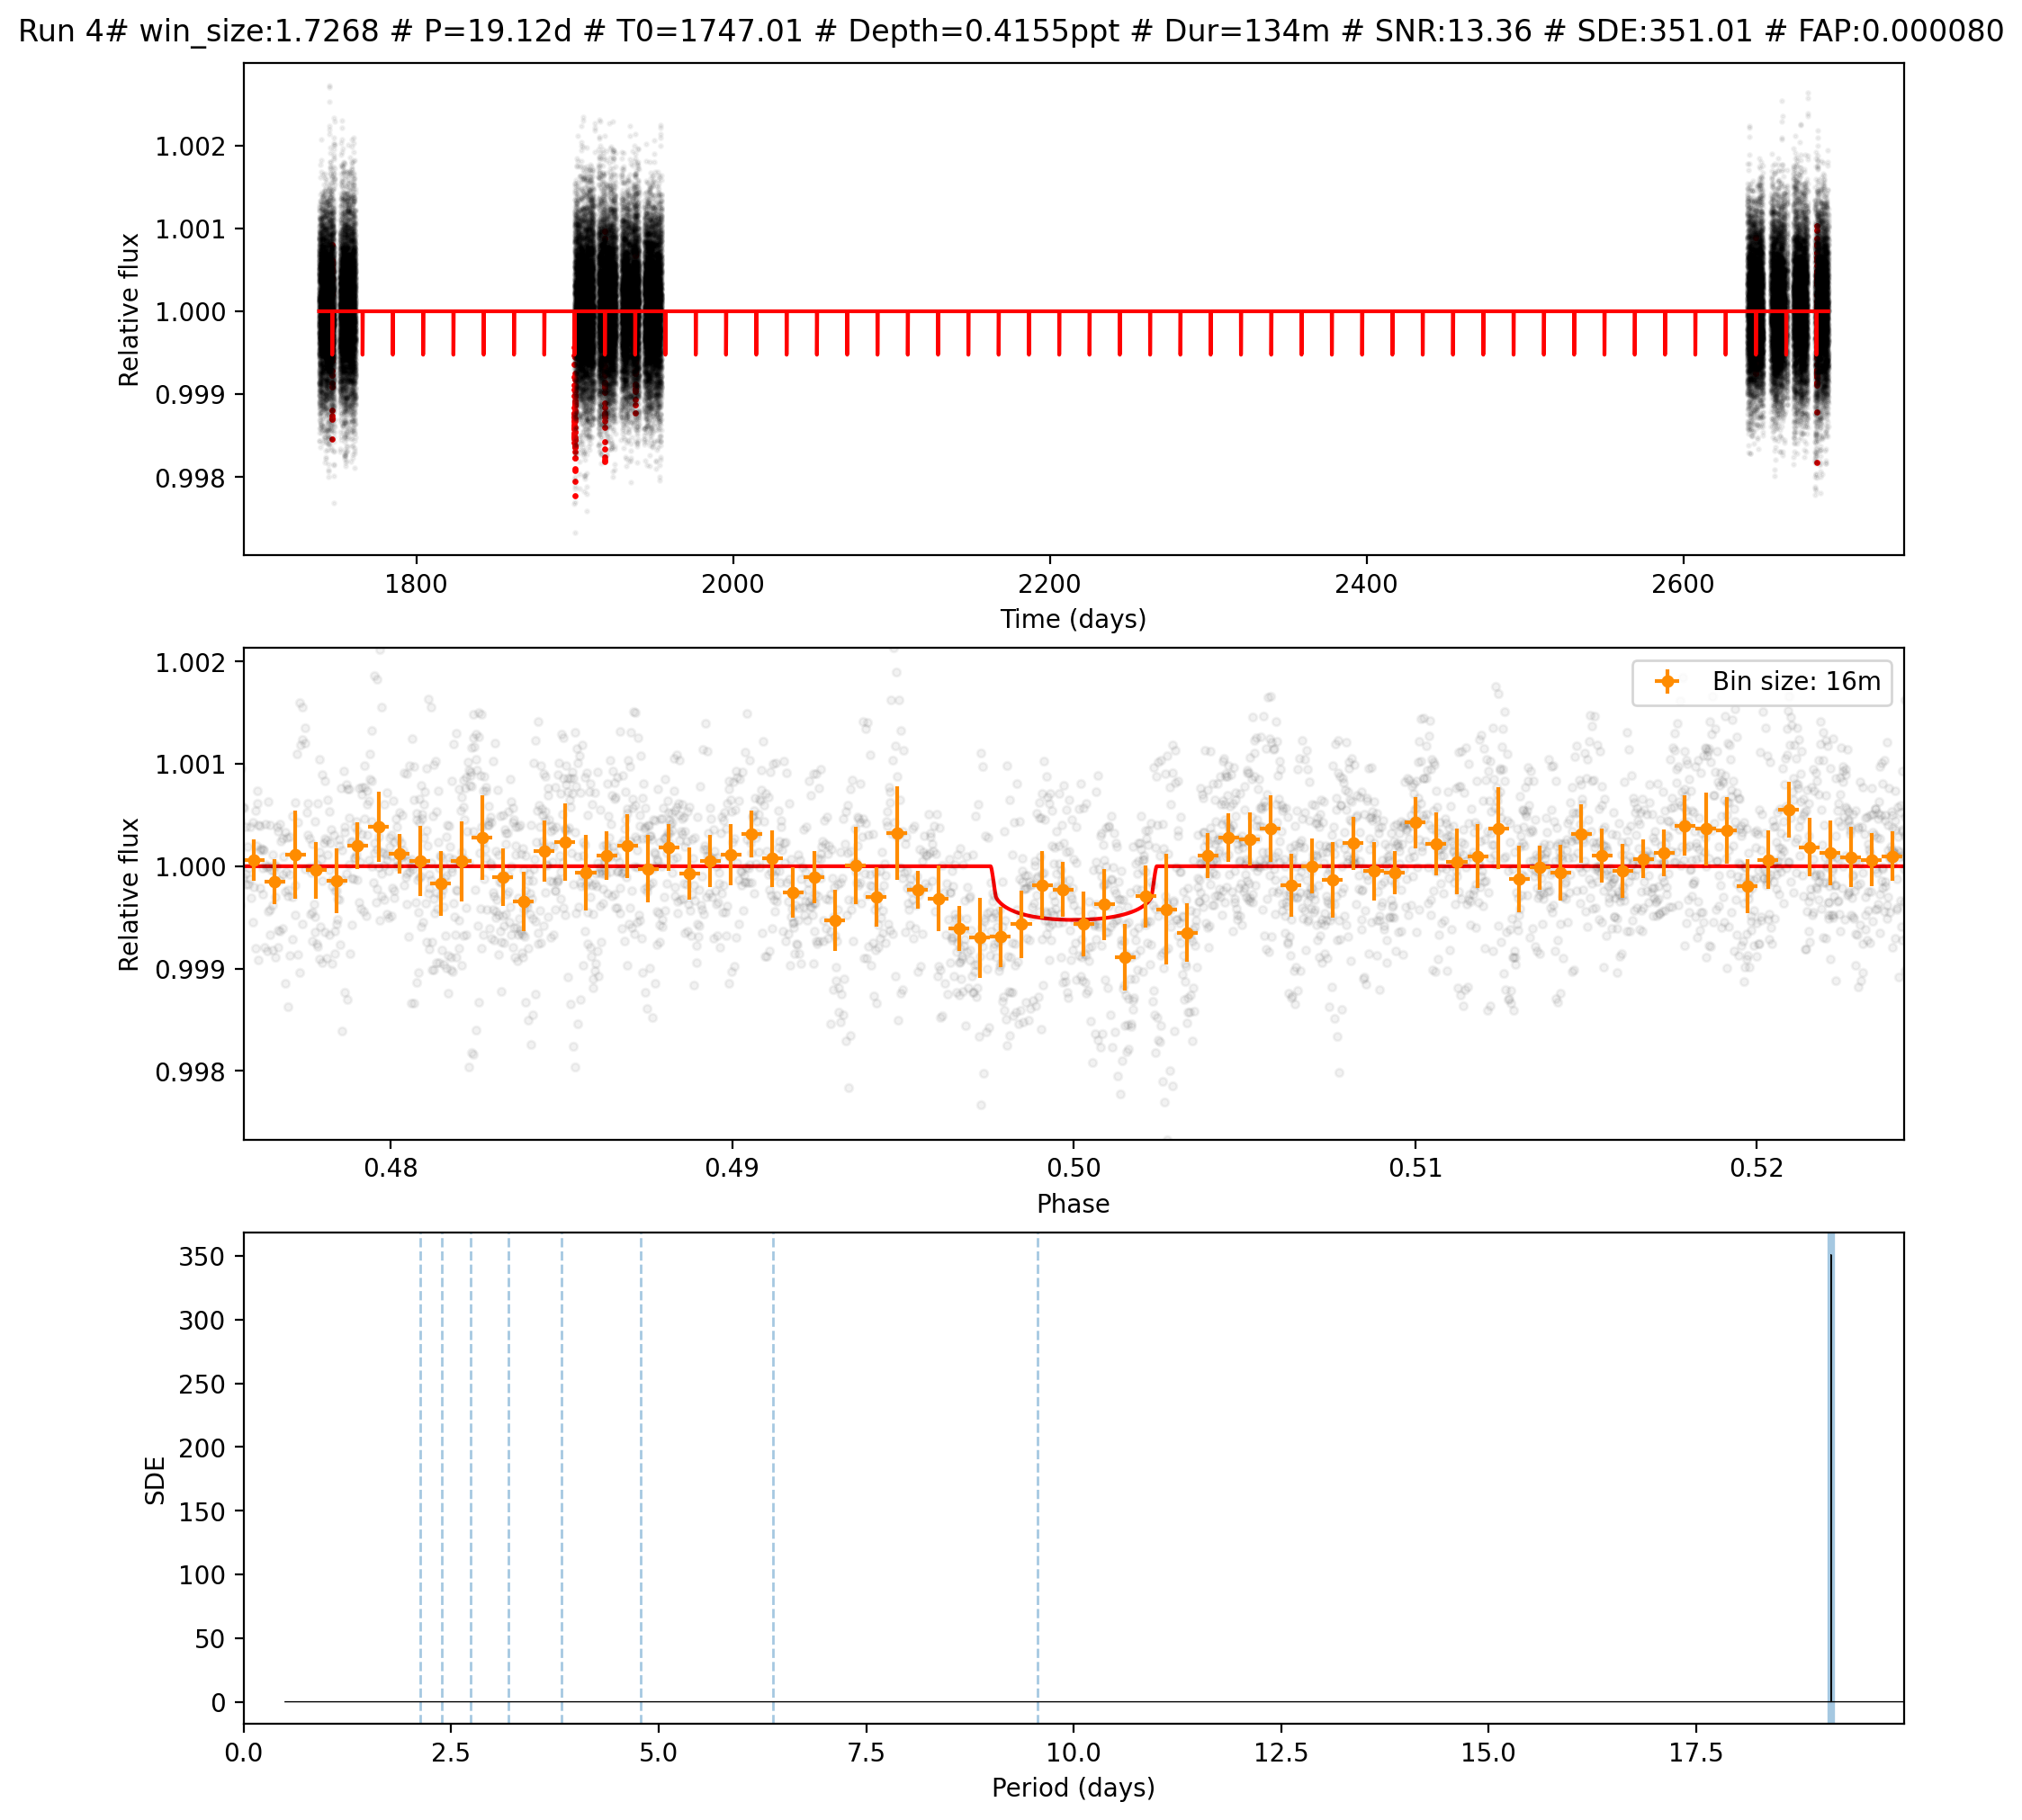

In [3]:
file_image = your_execution_dir + '/TIC198153540_[16,_22,_23,_49,_50]/4/Run_4_ws=1.7268_TIC198153540_[16, 22, 23, 49, 50].png'
from IPython.display import Image
Image(filename=file_image)

If we looked into the resulting directory, we'd appreciate from the 4th run log that the 19.12 days signal was spotted only in four detrends out of ten and the rest of them found no signals at all:

```
________________________________ run 4________________________________
=================================
SEARCH OF SIGNALS - Run 4
=================================
win_size    Period      Per_err   N.Tran  Mean Depth (ppt)  T. dur (min)  T0            SNR         SDE         FAP           Border_score    Matching OI   Harmonic    Planet radius (R_Earth)  Rp/Rs     Semi-major axis   Habitability Zone   
PDCSAP_FLUX nan         -9.749788 nan     nan               nan           0.0000        nan         0.000       nan           0.00            nan           -           nan                      nan       nan               -                   
0.4011      nan         -9.749788 nan     nan               nan           0.0000        nan         0.000       nan           0.00            nan           -           nan                      nan       nan               -                   
0.5904      nan         -9.749788 nan     nan               nan           0.0000        nan         0.000       nan           0.00            nan           -           nan                      nan       nan               -                   
0.7798      nan         -9.749788 nan     nan               nan           0.0000        nan         0.000       nan           0.00            nan           -           nan                      nan       nan               -                   
0.9692      nan         -9.749788 nan     nan               nan           0.0000        nan         0.000       nan           0.00            nan           -           nan                      nan       nan               -                   
1.1586      nan         -9.749788 nan     nan               nan           0.0000        nan         0.000       nan           0.00            nan           -           nan                      nan       nan               -                   
1.3480      nan         -9.749788 nan     nan               nan           0.0000        nan         0.000       nan           0.00            nan           -           nan                      nan       nan               -                   
1.5374      nan         -9.749788 nan     nan               nan           0.0000        nan         0.000       nan           0.00            nan           -           nan                      nan       nan               -                   
1.7268      19.12339    0.001110  6       0.415             133.8         1747.0102     13.356      351.011     8.0032e-05    0.83            nan           -           1.74641                  0.02084   0.13406           I                   
1.9161      19.12339    0.001110  6       0.412             133.8         1747.0102     13.287      285.781     8.0032e-05    0.83            nan           -           1.73820                  0.02083   0.13406           I                   
2.1055      19.12339    0.001110  6       0.405             133.8         1747.0102     13.097      350.962     8.0032e-05    0.83            nan           -           1.72525                  0.02069   0.13406           I                   
2.2949      19.12339    0.001110  6       0.401             133.8         1747.0102     12.931      351.011     8.0032e-05    0.83            nan           -           1.71523                  0.02056   0.13406           I                   
2.4843      nan         -9.749788 nan     nan               nan           0.0000        nan         0.000       nan           0.00            nan           -           nan                      nan       nan               -                   
Elected signal with QUORUM algorithm from 4 VOTES --> NAME: 7	Period:19.123394593311595	CORR_SDE: 373.51212301944247	SNR: 13.356395837142067	SDE: 351.0113927170664	FAP: 8.0032e-05	BORDER_SCORE: 0.8333333333333334
```

This case is a limit scenario and we always are hesitant about this kind of candidates, but we will keep it as an interesting signature and will try to solve it in a vetting execution.